In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Load the before and after images
before_img = cv2.imread("before.png")
after_img = cv2.imread("after.png")

In [25]:
before_gray = cv2.cvtColor(before_img, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after_img, cv2.COLOR_BGR2GRAY)

In [26]:
if before_gray.shape != after_gray.shape:
    after_gray = cv2.resize(after_gray, (before_gray.shape[1], before_gray.shape[0]))

In [27]:
# Compute the absolute difference between the two images
difference = cv2.absdiff(before_gray, after_gray)

In [28]:
# Apply thresholding to highlight the significant changes
_, diff_thresh = cv2.threshold(difference, 50, 255, cv2.THRESH_BINARY)

In [29]:
# Find contours of the changes
contours, _ = cv2.findContours(diff_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [30]:
# Draw the contours on the original images to highlight the changes
before_contours = before_img.copy()
after_contours = after_img.copy()

In [31]:
cv2.drawContours(before_contours, contours, -1, (0, 255, 0), 2)  # Green contours on before image
cv2.drawContours(after_contours, contours, -1, (0, 255, 0), 2)   # Green contours on after image

array([[[  0, 255,   0],
        [  0, 255,   0],
        [152, 164, 165],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [132, 144, 146],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [117, 129, 130],
        ...,
        [ 41,  49,  49],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[152, 159, 159],
        [153, 160, 160],
        [155, 161, 162],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[161, 167, 168],
        [162, 169, 170],
        [164, 171, 171],
        ...,
        [  0, 255,   0],
        [141, 146, 149],
        [147, 152, 154]],

       [[168, 175, 176],
        [169, 177, 177],
        [171, 178, 179],
        ...,
        [159, 165, 167],
        [159, 165, 167],
        [162, 167, 170]]

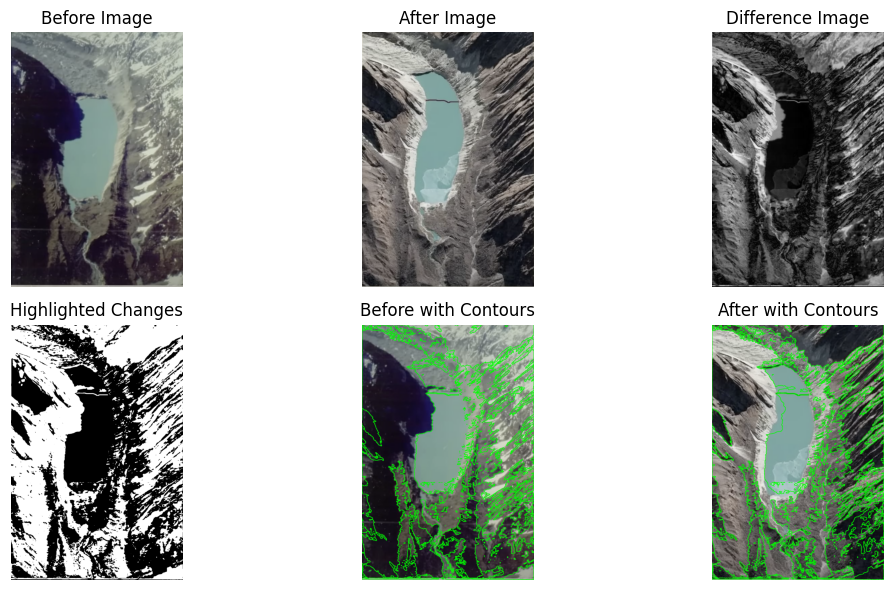

In [32]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Original Images
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(before_img, cv2.COLOR_BGR2RGB))
plt.title('Before Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(after_img, cv2.COLOR_BGR2RGB))
plt.title('After Image')
plt.axis('off')

# Difference Image
plt.subplot(2, 3, 3)
plt.imshow(difference, cmap='gray')
plt.title('Difference Image')
plt.axis('off')

# Thresholded Difference (Highlighted Changes)
plt.subplot(2, 3, 4)
plt.imshow(diff_thresh, cmap='gray')
plt.title('Highlighted Changes')
plt.axis('off')

# Image with Contours on Before Image
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(before_contours, cv2.COLOR_BGR2RGB))
plt.title('Before with Contours')
plt.axis('off')

# Image with Contours on After Image
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(after_contours, cv2.COLOR_BGR2RGB))
plt.title('After with Contours')
plt.axis('off')

# Show all images
plt.tight_layout()
plt.show()